<a href="https://colab.research.google.com/github/RudraKhare/Quntium-Internship---Data-Analytics-/blob/main/Store_Performance_Sales_Control_Vs_Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [201]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.offline as offline
offline.init_notebook_mode()
import cufflinks as cf
cf.go_offline()

In [202]:
data=pd.read_csv("/content/QVI_data.csv")
data.head()

LYLTY_CARD_NBR        DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0            1000  2018-10-17          1       1         5   
1            1002  2018-09-16          1       2        58   
2            1003  2019-03-07          1       3        52   
3            1003  2019-03-08          1       4       106   
4            1004  2018-11-02          1       5        96   

                                PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0  Natural Chip        Compny SeaSalt175g         2        6.0        175   
1   Red Rock Deli Chikn&Garlic Aioli 150g         1        2.7        150   
2   Grain Waves Sour    Cream&Chives 210G         1        3.6        210   
3  Natural ChipCo      Hony Soy Chckn175g         1        3.0        175   
4          WW Original Stacked Chips 160g         1        1.9        160   

        BRAND              LIFESTAGE PREMIUM_CUSTOMER  
0     NATURAL  YOUNG SINGLES/COUPLES          Premium  
1         RRD  YOUNG SINGLES/COUPLES       Mainstream  
2     GRNWVES         YOUNG FAMILIES           Budget  
3     NATURAL         YOUNG FAMILIES           Budget  
4  WOOLWORTHS  OLDER SINGLES/COUPLES       Mainstream

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [204]:
data['DATE']=pd.to_datetime(data['DATE'])
#pd.to_datetime() is a function provided by the Pandas library that converts input to datetime. In this case, it's being used to convert the 'DATE' column of the DataFrame 'data' to datetime format.

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.2+ MB


In [206]:
data['YEARMONTH'] = data['DATE'].dt.year*100 + data['DATE'].dt.month

In [207]:
data

LYLTY_CARD_NBR       DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0                 1000 2018-10-17          1       1         5   
1                 1002 2018-09-16          1       2        58   
2                 1003 2019-03-07          1       3        52   
3                 1003 2019-03-08          1       4       106   
4                 1004 2018-11-02          1       5        96   
...                ...        ...        ...     ...       ...   
264829         2370701 2018-12-08         88  240378        24   
264830         2370751 2018-10-01         88  240394        60   
264831         2370961 2018-10-24         88  240480        70   
264832         2370961 2018-10-27         88  240481        65   
264833         2373711 2018-12-14         88  241815        16   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1          Red Rock Deli Chikn&Garlic Aioli 150g         1        2.7   
2          Grain Waves Sour    Cream&Chives 210G         1        3.6   
3         Natural ChipCo      Hony Soy Chckn175g         1        3.0   
4                 WW Original Stacked Chips 160g         1        1.9   
...                                          ...       ...        ...   
264829     Grain Waves         Sweet Chilli 210g         2        7.2   
264830      Kettle Tortilla ChpsFeta&Garlic 150g         2        9.2   
264831   Tyrrells Crisps     Lightly Salted 165g         2        8.4   
264832  Old El Paso Salsa   Dip Chnky Tom Ht300g         2       10.2   
264833  Smiths Crinkle Chips Salt & Vinegar 330g         2       11.4   

        PACK_SIZE       BRAND              LIFESTAGE PREMIUM_CUSTOMER  \
0             175     NATURAL  YOUNG SINGLES/COUPLES          Premium   
1             150         RRD  YOUNG SINGLES/COUPLES       Mainstream   
2             210     GRNWVES         YOUNG FAMILIES           Budget   
3             175     NATURAL         YOUNG FAMILIES           Budget   
4             160  WOOLWORTHS  OLDER SINGLES/COUPLES       Mainstream   
...           ...         ...                    ...              ...   
264829        210     GRNWVES         YOUNG FAMILIES       Mainstream   
264830        150      KETTLE         YOUNG FAMILIES          Premium   
264831        165    TYRRELLS         OLDER FAMILIES           Budget   
264832        300         OLD         OLDER FAMILIES           Budget   
264833        330      SMITHS  YOUNG SINGLES/COUPLES       Mainstream   

        YEARMONTH  
0          201810  
1          201809  
2          201903  
3          201903  
4          201811  
...           ...  
264829     201812  
264830     201810  
264831     201810  
264832     201810  
264833     201812  

[264834 rows x 13 columns]

### METRICS UNDER CONSIDERATION:
#### - Monthly overall sales revenue
#### - Monthly number of customers
#### - Monthly number of transactions per customer

In [208]:
metrics=data.groupby(['STORE_NBR','YEARMONTH']).agg({'TOT_SALES':'sum','LYLTY_CARD_NBR':'nunique','TXN_ID':'nunique','PROD_QTY':'sum'})
metrics['PRICE_PER_UNIT']=metrics['TOT_SALES']/metrics['PROD_QTY']
metrics['CHIPS_PER_TXN']=metrics['PROD_QTY']/metrics['TXN_ID']
metrics=metrics.rename(columns={'LYLTY_CARD_NBR':'CUSTOMERS'})
metrics['TXN_PER_CUST']=metrics['TXN_ID']/metrics['CUSTOMERS']
metrics.drop(['TXN_ID'],axis=1,inplace=True)


In [209]:
metrics.head()

TOT_SALES  CUSTOMERS  PROD_QTY  PRICE_PER_UNIT  \
STORE_NBR YEARMONTH                                                   
1         201807         206.9         49        62        3.337097   
          201808         176.1         42        54        3.261111   
          201809         278.8         59        75        3.717333   
          201810         188.1         44        58        3.243103   
          201811         192.6         46        57        3.378947   

                     CHIPS_PER_TXN  TXN_PER_CUST  
STORE_NBR YEARMONTH                               
1         201807          1.192308      1.061224  
          201808          1.255814      1.023810  
          201809          1.209677      1.050847  
          201810          1.288889      1.022727  
          201811          1.212766      1.021739

In [210]:
full=metrics.copy()

In [211]:
#taking data before 2019-02 into consideration

trial=[]
for i in metrics.index:
  if(i[1]>=201902):
     if(i[1]<=201904):
      trial.append(metrics.loc[i])
      metrics.drop(i,inplace=True)
trial=pd.DataFrame(trial)

In [212]:
#TAKING DTA AFTER 2019-02 INTO trial dataframe
print(trial.head(5))

          TOT_SALES  CUSTOMERS  PROD_QTY  PRICE_PER_UNIT  CHIPS_PER_TXN  \
1 201902      225.4       52.0      65.0        3.467692       1.181818   
  201903      192.9       45.0      58.0        3.325862       1.183673   
  201904      192.9       42.0      57.0        3.384211       1.325581   
2 201902      139.4       29.0      37.0        3.767568       1.156250   
  201903      192.1       43.0      51.0        3.766667       1.108696   

          TXN_PER_CUST  
1 201902      1.057692  
  201903      1.088889  
  201904      1.023810  
2 201902      1.103448  
  201903      1.069767  


In [213]:
# Set index name
trial.index.name = 'IDX'

# Create new columns for store number and month-year
trial['STORE_NBR'] = trial.index.map(lambda x: x[0])
trial['MONTHYEAR'] = trial.index.map(lambda x: x[1])

# Drop the 'IDX' column
trial.reset_index(drop=True, inplace=True)

# Set the multi-index using 'STORE_NBR' and 'MONTHYEAR' columns
trial.set_index(['STORE_NBR', 'MONTHYEAR'], inplace=True)


In [214]:
trial.head(5)

TOT_SALES  CUSTOMERS  PROD_QTY  PRICE_PER_UNIT  \
STORE_NBR MONTHYEAR                                                   
1         201902         225.4       52.0      65.0        3.467692   
          201903         192.9       45.0      58.0        3.325862   
          201904         192.9       42.0      57.0        3.384211   
2         201902         139.4       29.0      37.0        3.767568   
          201903         192.1       43.0      51.0        3.766667   

                     CHIPS_PER_TXN  TXN_PER_CUST  
STORE_NBR MONTHYEAR                               
1         201902          1.181818      1.057692  
          201903          1.183673      1.088889  
          201904          1.325581      1.023810  
2         201902          1.156250      1.103448  
          201903          1.108696      1.069767

### Funtions to find correlation and magnitude of any store wih another store

In [215]:
def calcCorr(STORE_NBR):
    '''
    input=store number which is to be compared
    output=dataframe with corelation coefficient values
    '''
    a=[]
    metrix=metrics[['TOT_SALES','CUSTOMERS']]#add metrics as required e.g. ,'TXN_PER_CUST'
    for i in metrix.index:
        a.append(metrix.loc[STORE_NBR].corrwith(metrix.loc[i[0]]))
    df= pd.DataFrame(a)
    df.index=metrix.index
    df=df.drop_duplicates()
    df.index=[s[0] for s in df.index]
    df.index.name="STORE_NBR"
    return df

In [216]:
def standardizer(df):

  df=df.abs()#Takes the absolute values of all elements in the DataFrame.
  df['MAGNITUDE']=df.mean(axis=1) #Calculates the mean across each row of the DataFrame and assigns it to a new column named 'MAGNITUDE'.
  return df

### Store 77
Finding stores corelated to store 77

In [217]:
corr77=calcCorr(77)

In [218]:
corr77.head()

TOT_SALES  CUSTOMERS
STORE_NBR                      
1           0.138045   0.292531
2           0.092418   0.226371
3           0.383045   0.722707
4          -0.529948  -0.526731
5          -0.253424  -0.172905

In [219]:
corr77=standardizer(corr77)


In [220]:
corr77=pd.DataFrame(corr77)

In [221]:
corr77 = corr77.sort_values(by='MAGNITUDE', ascending=False).dropna()

In [222]:
corr77

TOT_SALES  CUSTOMERS  MAGNITUDE
STORE_NBR                                 
77          1.000000   1.000000   1.000000
233         0.880004   0.994132   0.937068
84          0.777507   0.876067   0.826787
41          0.836940   0.799126   0.818033
115         0.715956   0.839229   0.777592
...              ...        ...        ...
235         0.000945   0.045447   0.023196
197         0.039717   0.002253   0.020985
45          0.026800   0.008064   0.017432
135         0.012847   0.015775   0.014311
228         0.017206   0.000000   0.008603

[263 rows x 3 columns]

#### **shows that stores 233,119,71 are the most correlated to store 77

### Selecting 233 as control store as it has  max correlation

## Visualizing ...

In [223]:
#Taking 0.7 as threshold corelation

<Axes: xlabel='STORE_NBR'>

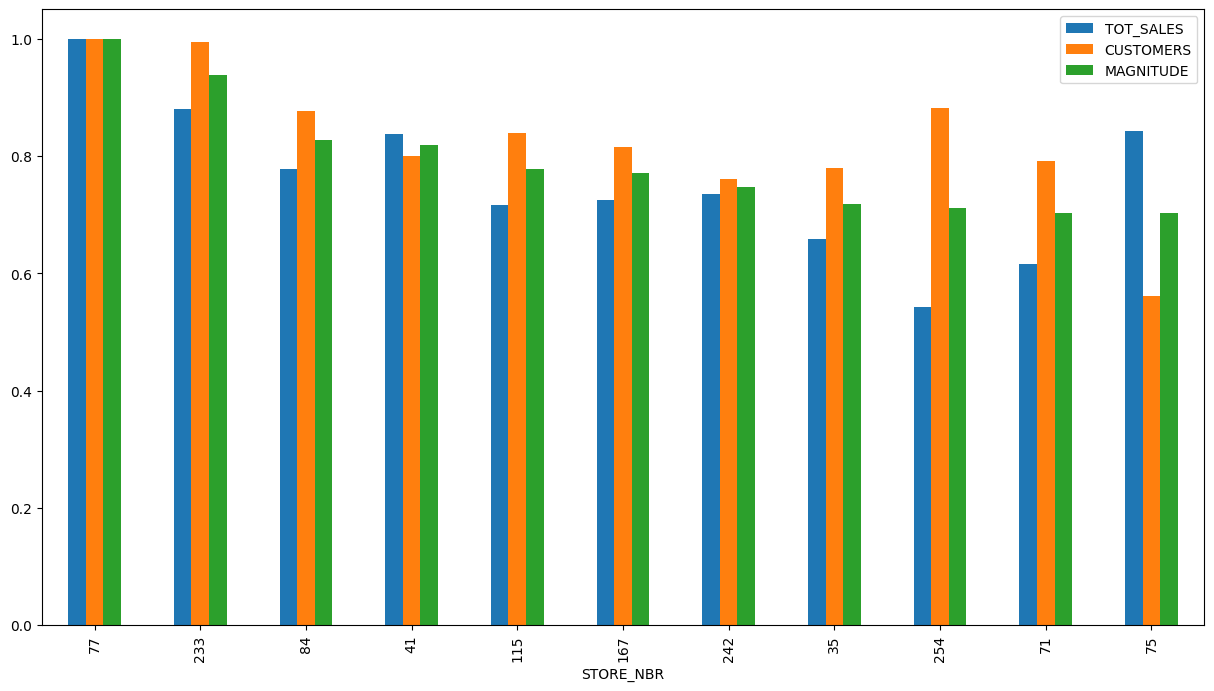

In [224]:
corr77[(corr77.MAGNITUDE.abs()>0.7)].plot(kind='bar',figsize=(15,8))
#corr77['MAGNITUDE'].abs() calculates the absolute value of the 'MAGNITUDE' column.
#corr77[(corr77['MAGNITUDE'].abs() > 0.7)] filters the DataFrame corr77 to include only rows where the absolute value of the 'MAGNITUDE' column is greater than 0.7..plot(kind='bar', figsize=(15, 8)) creates a bar plot for the filtered DataFrame with a specified figure size.


<Axes: ylabel='STORE_NBR'>

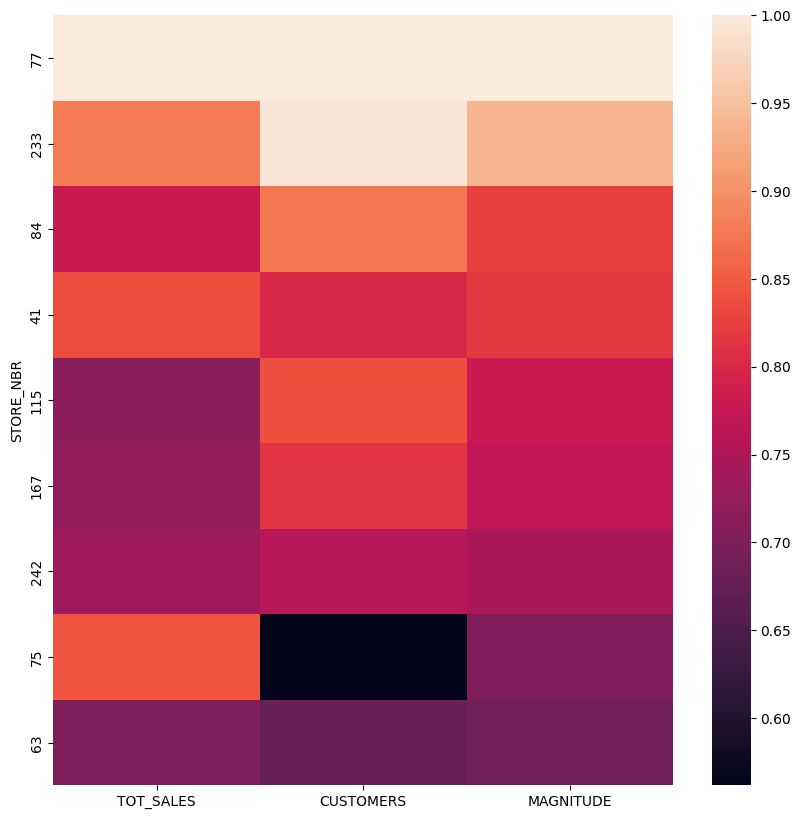

In [225]:
plt.figure(figsize=(10,10))
sns.heatmap(corr77[corr77.TOT_SALES.abs()>0.7])

#### Taking the store 233 into consideration plotting different measure against those of store 77

<ipython-input-226-8d02d6235829>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-226-8d02d6235829>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




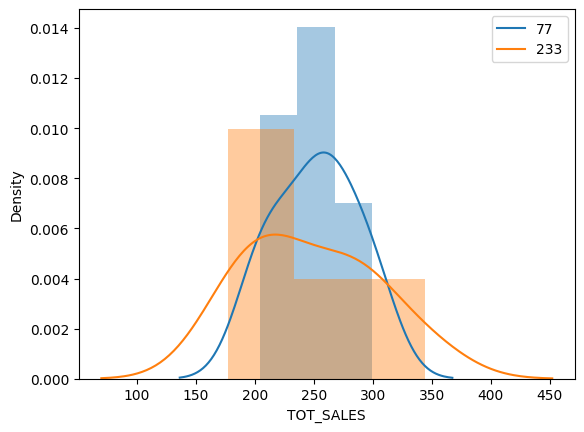

In [226]:
sns.distplot(metrics.loc[77]['TOT_SALES'])
sns.distplot(metrics.loc[233]['TOT_SALES'])
plt.legend(labels=['77','233'])

<ipython-input-227-de7c783a6076>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-227-de7c783a6076>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




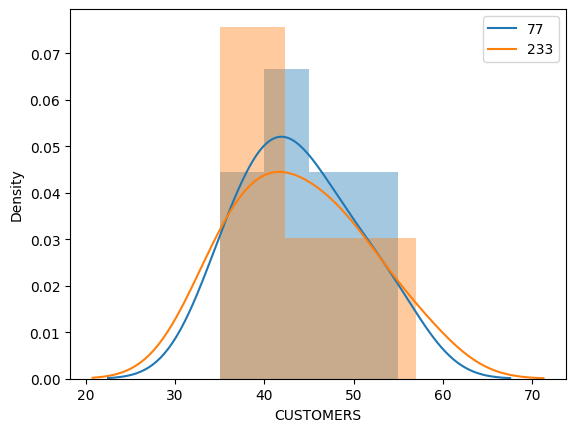

In [227]:
sns.distplot(metrics.loc[77]['CUSTOMERS'])
sns.distplot(metrics.loc[233]['CUSTOMERS'])
plt.legend(labels=['77','233'])

<ipython-input-228-29a30bd1800b>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-228-29a30bd1800b>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




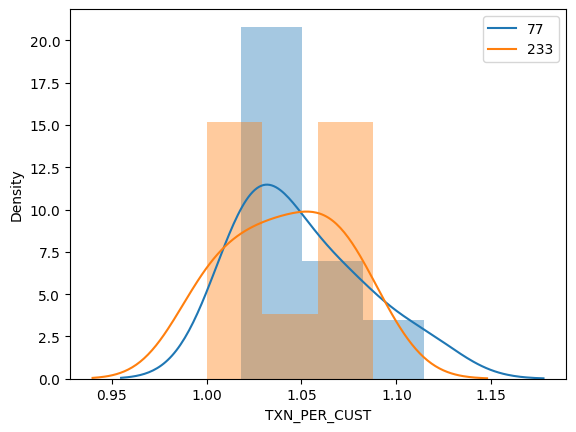

In [228]:
sns.distplot(metrics.loc[77]['TXN_PER_CUST'])
sns.distplot(metrics.loc[233]['TXN_PER_CUST'])
plt.legend(labels=['77','233'])

### Since distributions of store 233 are similar to that of store 77, selecting store 233 as control store with max similarities to store 77

## Calculating difference between scaled control sales and trial sales
Let null hypothesis be that both stores 77 ans 233 have no difference

In [229]:
from scipy.stats import ks_2samp,ttest_ind,t
#ks_2samp: This function is used to perform the Kolmogorov-Smirnov test for the comparison of two samples. It tests whether two samples are drawn from the same continuous distribution.

#ttest_ind: This function is used to perform an independent two-sample t-test. It compares the means of two independent samples to determine whether there is a statistically significant difference between them.

#t: This function represents the Student's t-distribution. It can be used to calculate probabilities and critical values for the t-distribution, which is commonly used in hypothesis testing when the sample size is small and the population variance is unknown.

In [230]:
#diffence between control and trial sales
a=[]
for x in metrics.columns:
   a.append(ks_2samp(metrics.loc[77][x], metrics.loc[233][x])) #For each column x, this line calculates the Kolmogorov-Smirnov test statistic and p-value comparing the sales data of store 77 and store 233. The ks_2samp function takes two samples as input and returns the KS statistic and p-value. The .loc[77][x] and .loc[233][x] syntax selects the sales data for store 77 and store 233 from the column x.
a=pd.DataFrame(a,index=metrics.columns)

In [231]:
a

statistic    pvalue
TOT_SALES        0.222222  0.989469
CUSTOMERS        0.111111  1.000000
PROD_QTY         0.333333  0.730111
PRICE_PER_UNIT   0.222222  0.989469
CHIPS_PER_TXN    0.222222  0.989469
TXN_PER_CUST     0.222222  0.989469

If the p-value is less than a chosen significance level (commonly denoted as α, typically 0.05), then you reject the null hypothesis. This means that there is sufficient evidence to conclude that the two samples come from different distributions.

If the p-value is greater than the significance level, you fail to reject the null hypothesis. This means that there is not enough evidence to conclude that the two samples come from different distributions.

In summary, a lower p-value indicates stronger evidence against the null hypothesis, while a higher p-value suggests weaker evidence against the null hypothesis. Typically, the significance level (α) is chosen beforehand based on the desired level of confidence in the result.








We cant reject the null hypothesis

#The trial period goes from the start of February 2019 to April 2019. We now want to
see if there has been an uplift in overall chip sales.


In [232]:
b=[]
for x in trial.columns:
  b.append(ttest_ind(trial.loc[77][x].tail(2),trial.loc[233][x].tail(2)))
b=pd.DataFrame(b,index=metrics.columns)
#trial.loc[77][x] selects the column x (presumably representing sales data) for store 77 from the trial DataFrame, and .tail(2) retrieves the last 2 rows of that column.
#So, in this context, tail(2) is used to select the last two observations (rows) of sales data for store 77 (or store 233), presumably for the purpose of comparing the most recent sales data between the two stores.
#This can be useful if you're interested in comparing recent trends or behaviors, or if you want to focus on the most recent data points for some other reason.






In [233]:
b

statistic    pvalue
TOT_SALES        4.267336  0.050769
CUSTOMERS        2.586131  0.122618
PROD_QTY         4.043680  0.056063
PRICE_PER_UNIT  -0.634173  0.590828
CHIPS_PER_TXN    1.785126  0.216165
TXN_PER_CUST     0.332434  0.771171

In [234]:
#critical value
t.ppf(0.95,df=7)

1.894578605061305

t: This represents the Student's t-distribution, which is a probability distribution used in hypothesis testing when the sample size is small and the population standard deviation is unknown.
ppf: This is the percent point function, which is the inverse of the cumulative distribution function (CDF). It returns the critical value for a given probability (0.95 in this case).
0.95: This is the probability associated with the critical value, indicating a 95% confidence level.
df=7: This specifies the degrees of freedom, which is an important parameter in the t-distribution. In this case, df = 7, which is typically used for small sample sizes.
So, t.ppf(0.95, df=7) calculates the critical value associated with a 95% confidence level and 7 degrees of freedom in the t-distribution.

You would use this critical value in hypothesis testing to determine whether the calculated t-statistic falls within the critical region, which would lead to rejecting or failing to reject the null hypothesis, depending on the specific test being conducted.

So, the critical value for a 95% confidence level and 7 degrees of freedom is approximately 1.895. This means that if the absolute value of the calculated t-statistic exceeds 1.895, you would reject the null hypothesis at the 95% confidence level.

<ipython-input-235-536285c528f0>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-235-536285c528f0>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




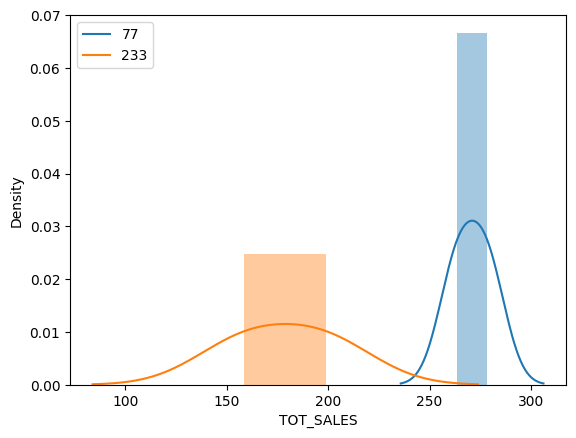

In [235]:
sns.distplot(trial.loc[77]['TOT_SALES'].tail(2))
sns.distplot(trial.loc[233]['TOT_SALES'].tail(2))
plt.legend(labels=['77','233'])

<ipython-input-236-2a7f1c6d83d9>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-236-2a7f1c6d83d9>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




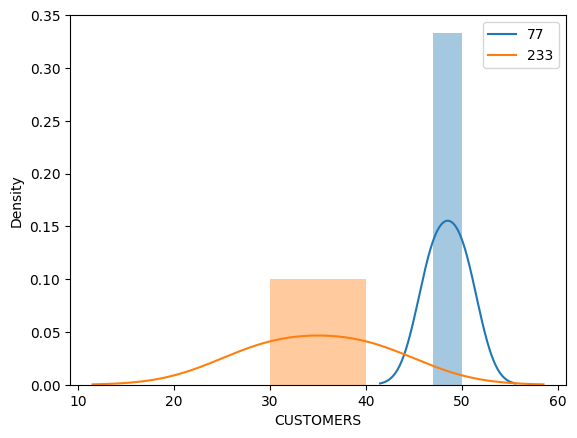

In [236]:
sns.distplot(trial.loc[77]['CUSTOMERS'].tail(2))
sns.distplot(trial.loc[233]['CUSTOMERS'].tail(2))
plt.legend(labels=['77','233'])

#### It can be visualized that the is a significant difference in the means, so trial store behavior(77) is different from control store (233).<br>
The results show that the trial in store 77 is significantly different to its
control store in the trial period as the trial store performance lies outside the
5% to 95% confidence interval of the control store in two of the three trial
months.


### Store 86
Repeating same process for trial store 86


In [237]:
corr86=calcCorr(86)

In [238]:
corr86.head(3)

TOT_SALES  CUSTOMERS
STORE_NBR                      
1           0.483857   0.486520
2          -0.237462   0.188549
3          -0.232796  -0.273946

In [239]:
corr86=standardizer(corr86)
corr86

TOT_SALES  CUSTOMERS  MAGNITUDE
STORE_NBR                                 
1           0.483857   0.486520   0.485188
2           0.237462   0.188549   0.213006
3           0.232796   0.273946   0.253371
4           0.048187   0.294060   0.171123
5           0.001803   0.387089   0.194446
...              ...        ...        ...
268         0.417161   0.082707   0.249934
269         0.672849   0.098401   0.385625
270         0.668908   0.774747   0.721827
271         0.330326   0.099780   0.215053
272         0.061332   0.337759   0.199545

[266 rows x 3 columns]

In [240]:
corr86=corr86.sort_values(['MAGNITUDE'],ascending=False).dropna()

In [241]:
corr86

TOT_SALES  CUSTOMERS  MAGNITUDE
STORE_NBR                                 
86          1.000000   1.000000   1.000000
155         0.885236   0.930845   0.908040
23          0.707142   0.885187   0.796165
260         0.668425   0.833410   0.750918
27          0.753940   0.724051   0.738995
...              ...        ...        ...
84          0.058078   0.002076   0.030077
165         0.016452   0.043292   0.029872
235         0.035689   0.022388   0.029039
263         0.037125   0.002408   0.019766
40          0.023051   0.009426   0.016238

[263 rows x 3 columns]

#### **shows that stores 155,23,120 are the most correlated to store 86

### Selecting 155 as control store as it has  max correlation

VISUALIZING

<Axes: xlabel='STORE_NBR'>

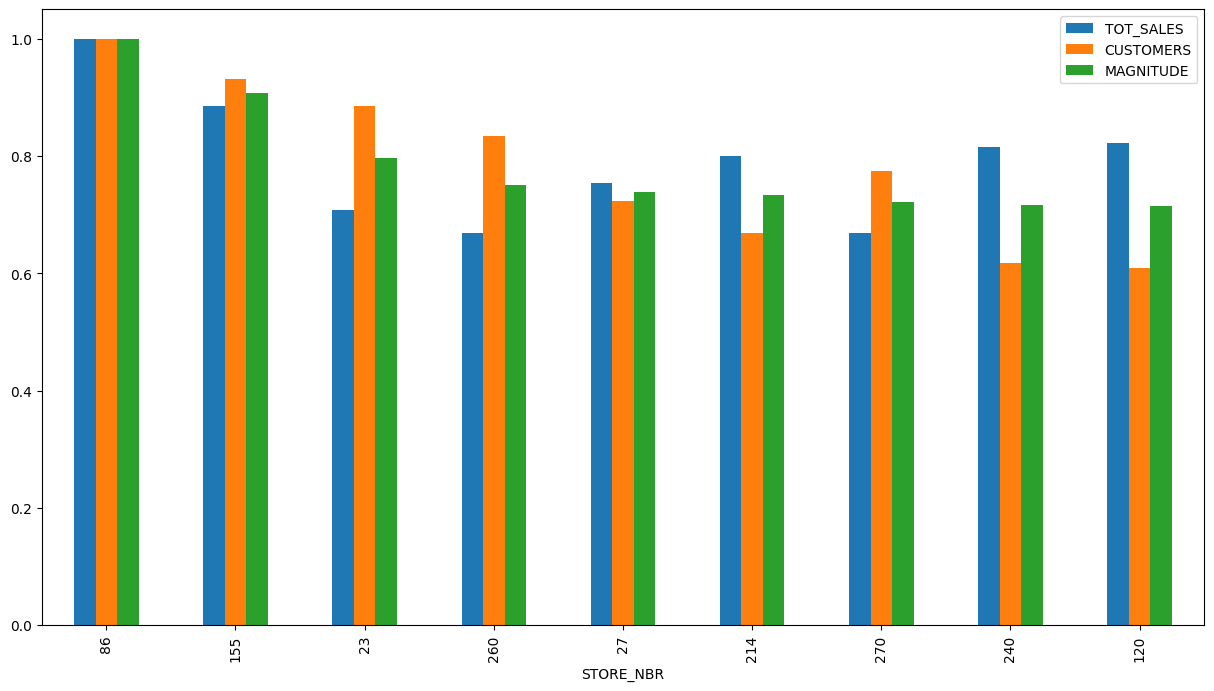

In [242]:
#Taking 0.7 as threshold corelation
corr86[(corr86.MAGNITUDE.abs()>0.7)].plot(kind='bar',figsize=(15,8))

<Axes: ylabel='STORE_NBR'>

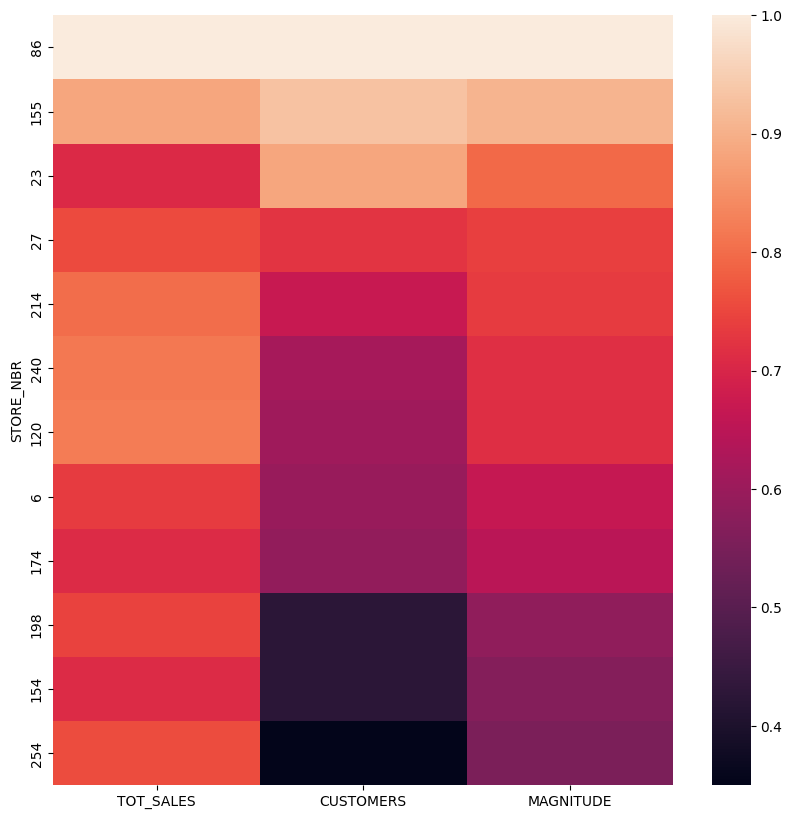

In [243]:
plt.figure(figsize=(10,10))
sns.heatmap(corr86[corr86.TOT_SALES.abs()>0.7])

In [244]:
#### Taking the store 155 into consideration plotting different measure against those of store 86

<ipython-input-245-f50418f92e3b>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-245-f50418f92e3b>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




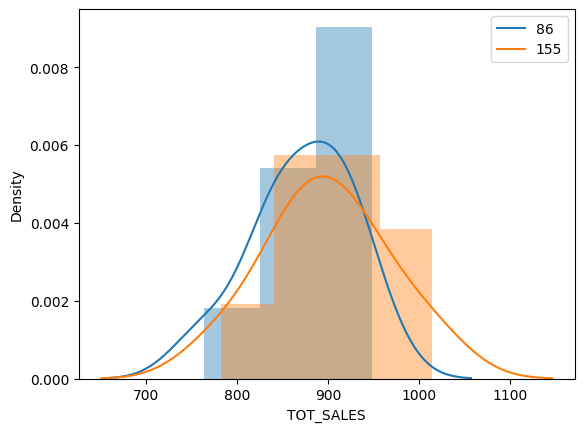

In [245]:
sns.distplot(metrics.loc[86]['TOT_SALES'])
sns.distplot(metrics.loc[155]['TOT_SALES'])
plt.legend(labels=['86','155'])

<ipython-input-246-df86b32c0a0e>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-246-df86b32c0a0e>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




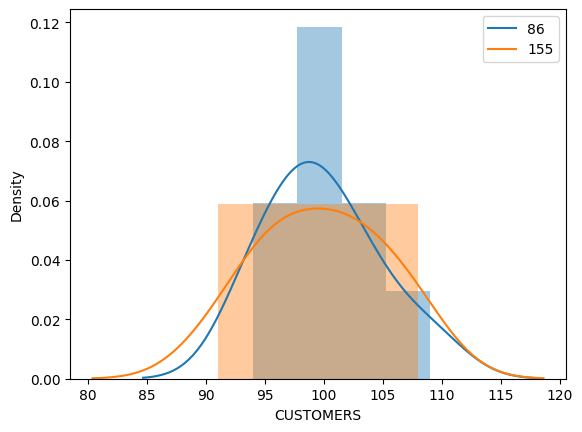

In [246]:
sns.distplot(metrics.loc[86]['CUSTOMERS'])
sns.distplot(metrics.loc[155]['CUSTOMERS'])
plt.legend(labels=['86','155'])

<ipython-input-247-a5243cb1b919>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-247-a5243cb1b919>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




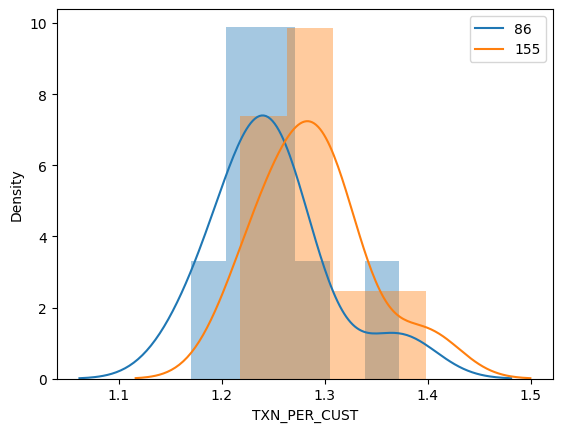

In [247]:
sns.distplot(metrics.loc[86]['TXN_PER_CUST'])
sns.distplot(metrics.loc[155]['TXN_PER_CUST'])
plt.legend(labels=['86','155'])

<ipython-input-248-43bc55766ab0>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-248-43bc55766ab0>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




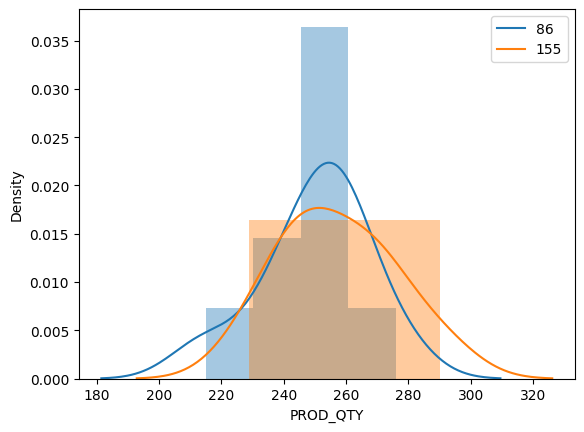

In [248]:
sns.distplot(metrics.loc[86]['PROD_QTY'])
sns.distplot(metrics.loc[155]['PROD_QTY'])
plt.legend(labels=['86','155'])

### Since distributions of store 155 are similar to that of store 86, selecting store 155 as control store with max similarities to store 86

## Calculating difference between scaled control sales and trial sales
Let null hypothesis be that both stores 77 ans 233 have no difference

In [249]:
from scipy.stats import ks_2samp,ttest_ind,ttest_rel,t

In [250]:
# difference between control and trial sales
a=[]
for x in metrics.columns:
    a.append(ks_2samp(metrics.loc[86][x], metrics.loc[155][x]))
a=pd.DataFrame(a,index=metrics.columns)

In [251]:
a

statistic    pvalue
TOT_SALES        0.333333  0.730111
CUSTOMERS        0.222222  0.989469
PROD_QTY         0.333333  0.730111
PRICE_PER_UNIT   0.333333  0.730111
CHIPS_PER_TXN    0.222222  0.989469
TXN_PER_CUST     0.555556  0.125874

#### For pre trial period, since p-values for TOT_SALES, CUSTOMERS and PROD_QTY are high (say more than 0.95), we can't reject the null hypothesis
## Assessment of trial
The trial period goes from the start of February 2019 to April 2019. We now want to
see if there has been an uplift in overall chip sales.

In [252]:
b=[]
for x in trial.columns:
    b.append(ttest_ind(trial.loc[86][x].tail(2), trial.loc[155][x].tail(2)))
b=pd.DataFrame(b,index=metrics.columns)

In [253]:
b

statistic    pvalue
TOT_SALES        1.234512  0.342378
CUSTOMERS        2.414953  0.137076
PROD_QTY         1.862532  0.203568
PRICE_PER_UNIT   0.366214  0.749316
CHIPS_PER_TXN   -0.285938  0.801822
TXN_PER_CUST    -1.074767  0.394929

In [254]:
#critical value
t.ppf(0.95,df=7)

1.894578605061305

In [255]:
#### Vizualizing means

<ipython-input-256-993ae71e0d56>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-256-993ae71e0d56>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




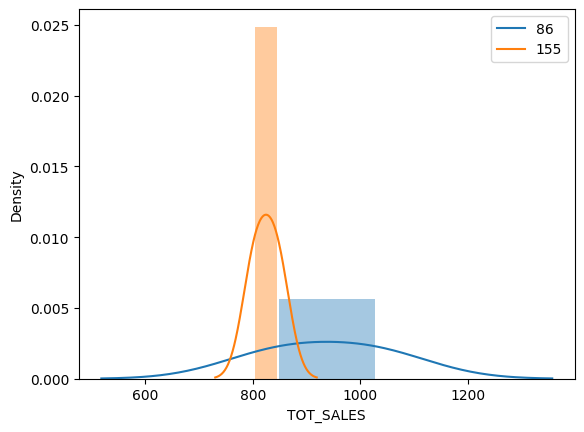

In [256]:
sns.distplot(trial.loc[86]['TOT_SALES'].tail(2))
sns.distplot(trial.loc[155]['TOT_SALES'].tail(2))
plt.legend(labels=['86','155'])

<ipython-input-257-0505f93cce56>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-257-0505f93cce56>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




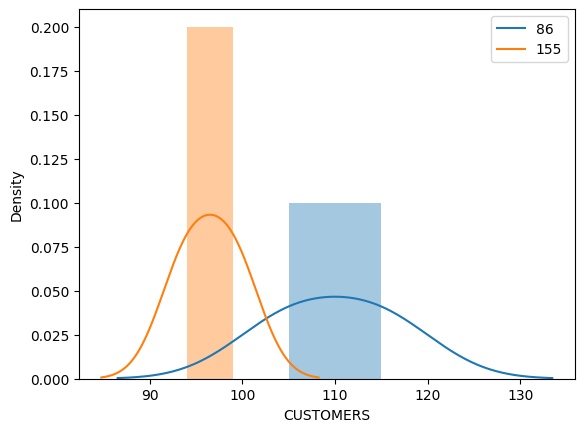

In [257]:
sns.distplot(trial.loc[86]['CUSTOMERS'].tail(2))
sns.distplot(trial.loc[155]['CUSTOMERS'].tail(2))
plt.legend(labels=['86','155'])

#### It can be visualized that the is a significant difference in the means, so trial store behavior(86) is different from control store (155).<br>
It looks like the number of customers is significantly higher in all of the three months. This seems to suggest that the trial had a significant impact on increasingthe number of customers in trial store 86 but as we saw, sales were not significantly higher. We should check with the Category Manager if there were special deals in the trial store that were may have resulted in lower prices, impacting the results.

## Store 88
#Finding stores corelated to store 88

In [258]:

corr88=calcCorr(88)

In [259]:
corr88.head(3)

TOT_SALES  CUSTOMERS
STORE_NBR                      
1           0.657299   0.343999
2          -0.202082  -0.127006
3          -0.371783   0.533943

In [260]:
corr88=standardizer(corr88)
corr88

TOT_SALES  CUSTOMERS  MAGNITUDE
STORE_NBR                                 
1           0.657299   0.343999   0.500649
2           0.202082   0.127006   0.164544
3           0.371783   0.533943   0.452863
4           0.407844   0.351343   0.379593
5           0.310585   0.280154   0.295370
...              ...        ...        ...
268         0.060247   0.717665   0.388956
269         0.145038   0.060771   0.102905
270         0.636188   0.131879   0.384034
271         0.017985   0.255827   0.136906
272         0.505246   0.094311   0.299778

[266 rows x 3 columns]

In [261]:
corr88=corr88.sort_values(['MAGNITUDE'],ascending=False).dropna()

In [262]:
corr88.head(15)

TOT_SALES  CUSTOMERS  MAGNITUDE
STORE_NBR                                 
88          1.000000   1.000000   1.000000
113         0.489780   0.797347   0.643564
187         0.619833   0.604224   0.612029
239         0.608617   0.613465   0.611041
134         0.870708   0.338051   0.604379
133         0.669638   0.524265   0.596951
237         0.236508   0.953220   0.594864
161         0.653020   0.534989   0.594004
14          0.632443   0.533647   0.583045
178         0.284718   0.880290   0.582504
69          0.477344   0.660688   0.569016
84          0.413161   0.702479   0.557820
235         0.667564   0.406436   0.537000
48          0.669364   0.396201   0.532782
102         0.471643   0.586902   0.529272

#### **shows that stores 178,14,133 are the most correlated to store 88

In [263]:
## Visualizing ...

<Axes: xlabel='STORE_NBR'>

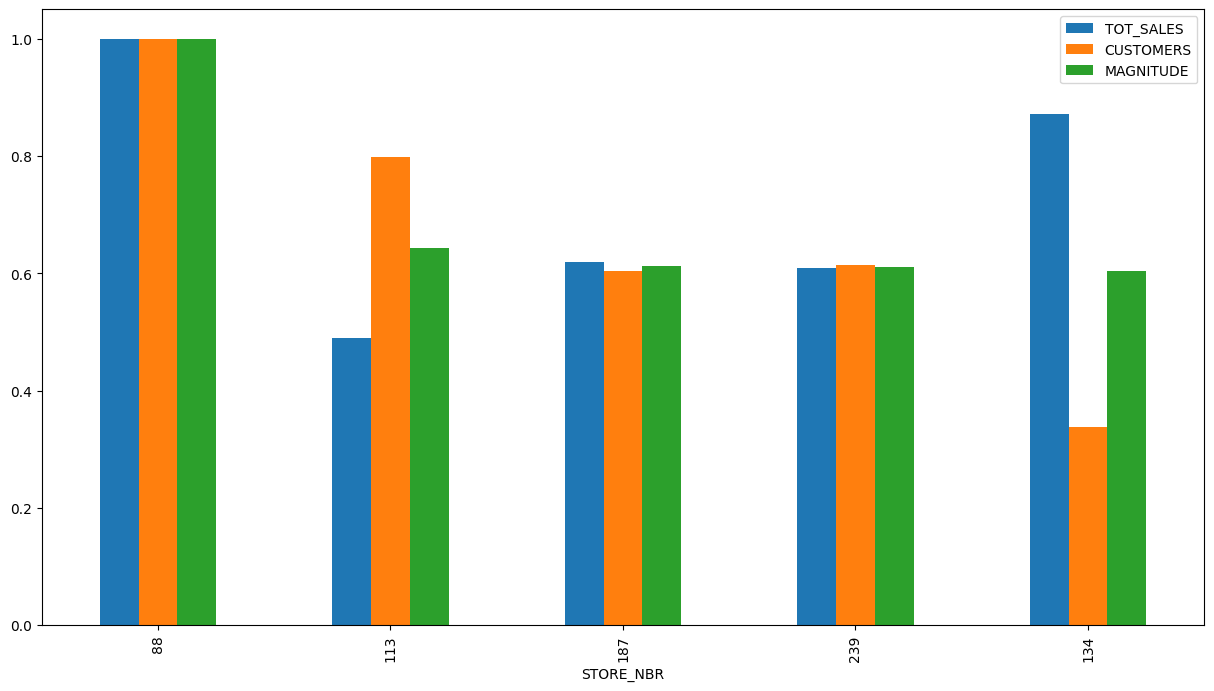

In [264]:
#Taking 0.6 as threshold corelation
corr88[(corr88.MAGNITUDE.abs()>0.6)].plot(kind='bar',figsize=(15,8))

<Axes: ylabel='STORE_NBR'>

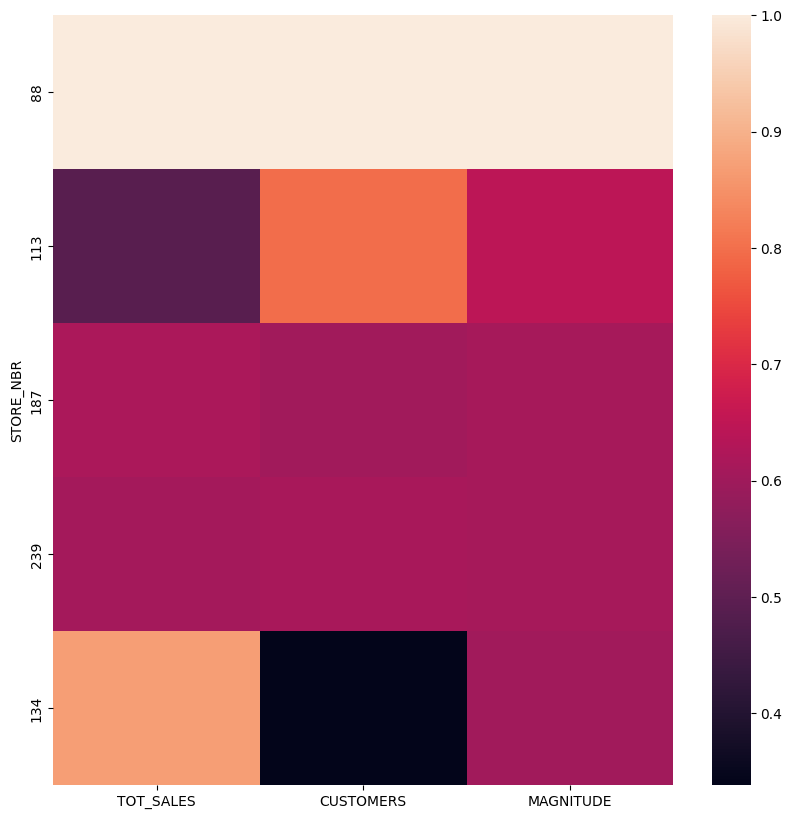

In [265]:
plt.figure(figsize=(10,10))
sns.heatmap(corr88[corr88.MAGNITUDE.abs()>0.6])

<ipython-input-266-2a32d86093c3>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-266-2a32d86093c3>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-266-2a32d86093c3>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your co

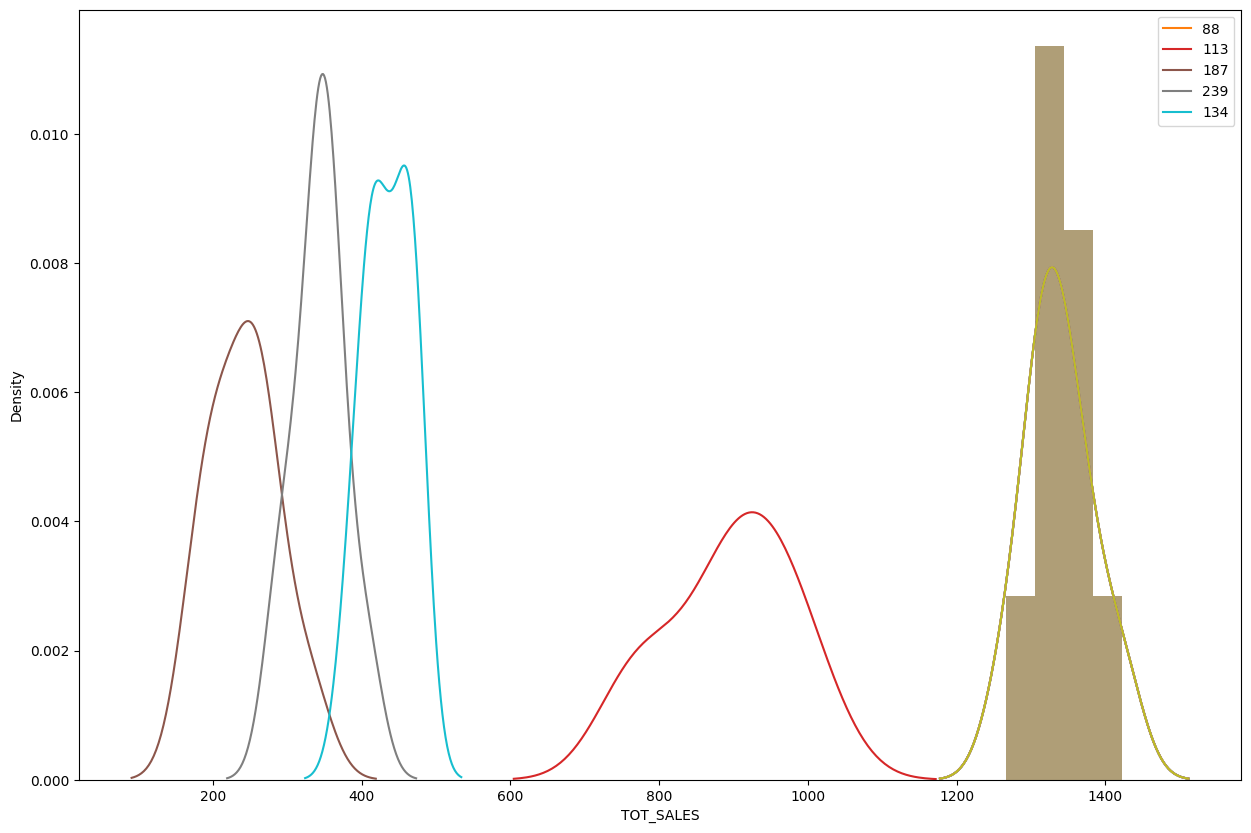

In [266]:
plt.figure(figsize=(15,10))
for x in corr88[corr88.MAGNITUDE.abs()>0.6].index:
    sns.distplot(metrics.loc[88]['TOT_SALES'])
    sns.distplot(metrics.loc[x]['TOT_SALES'],label=x,hist=False)
plt.legend()

#### Therefore Taking the store 237 into consideration plotting different measure against those of store 88

<ipython-input-267-7994e8644ade>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-267-7994e8644ade>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




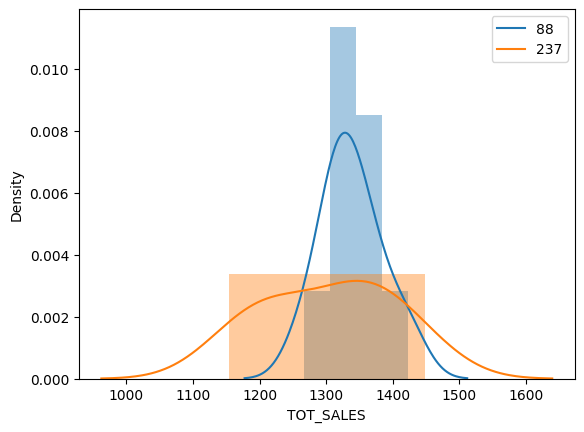

In [267]:
sns.distplot(metrics.loc[88]['TOT_SALES'])
sns.distplot(metrics.loc[237]['TOT_SALES'])
plt.legend(labels=['88','237'])

<ipython-input-268-af6472b1c316>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-268-af6472b1c316>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




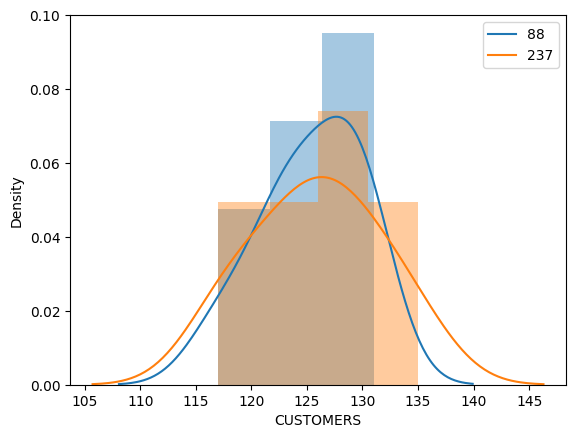

In [268]:
sns.distplot(metrics.loc[88]['CUSTOMERS'])
sns.distplot(metrics.loc[237]['CUSTOMERS'])
plt.legend(labels=['88','237'])

<ipython-input-269-fe45f63ceecc>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-269-fe45f63ceecc>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




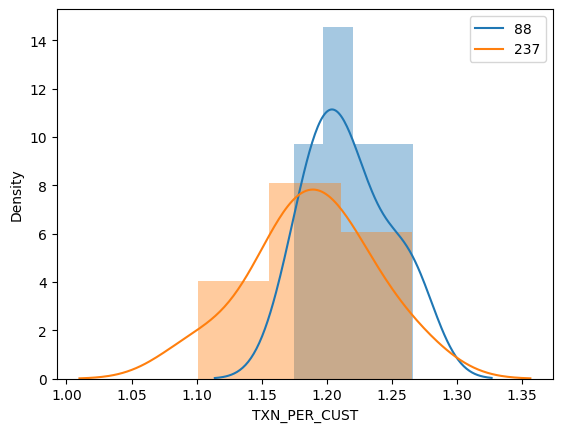

In [269]:
sns.distplot(metrics.loc[88]['TXN_PER_CUST'])
sns.distplot(metrics.loc[237]['TXN_PER_CUST'])
plt.legend(labels=['88','237'])

### Since distributions of store 237 are similar to that of store 88, selecting store 237 as control store with max similarities to store 88

## Calculating difference between scaled control sales and trial sales
Let null hypothesis be that both stores 88 ans 237 have no difference

In [270]:
from scipy.stats import ks_2samp,ttest_ind,t

In [271]:
# difference between control and trial sales
a=[]
for x in metrics.columns:
    a.append(ks_2samp(metrics.loc[88][x], metrics.loc[237][x]))
a=pd.DataFrame(a,index=metrics.columns)

In [272]:
a


statistic    pvalue
TOT_SALES        0.444444  0.351707
CUSTOMERS        0.222222  0.989469
PROD_QTY         0.444444  0.351707
PRICE_PER_UNIT   0.333333  0.730111
CHIPS_PER_TXN    0.555556  0.125874
TXN_PER_CUST     0.444444  0.351707

#### For pre trial period, since all of the p-values are high (say more than 0.05), we can't reject the null hypothesis
## Assessment of trial
The trial period goes from the start of February 2019 to April 2019. We now want to
see if there has been an uplift in overall chip sales.


In [273]:
#Sampling march and april from the 3 months

In [274]:
b=[]
for x in trial.columns:
    b.append(ttest_ind(trial.loc[86][x].tail(2), trial.loc[237][x].tail(2)))
b=pd.DataFrame(b,index=metrics.columns)

In [275]:
b

statistic    pvalue
TOT_SALES       -3.010587  0.094888
CUSTOMERS       -1.890571  0.199245
PROD_QTY        -0.266076  0.815100
PRICE_PER_UNIT  -6.804115  0.020925
CHIPS_PER_TXN   -0.465456  0.687370
TXN_PER_CUST     9.547202  0.010794

In [276]:
#critical value
t.ppf(0.95,df=7)

1.894578605061305

Since all of the p-values are high (say more than 0.05), we reject the null hypothesis i.e. there means are significantly different.<br>

The results show that the trial in store 88 is significantly different to its
control store in the trial period as the trial store performance lies outside of
the 5% to 95% confidence interval of the control store in two of the three trial
months.

#### Vizualizing means

<ipython-input-277-f12766f3c27b>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-277-f12766f3c27b>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




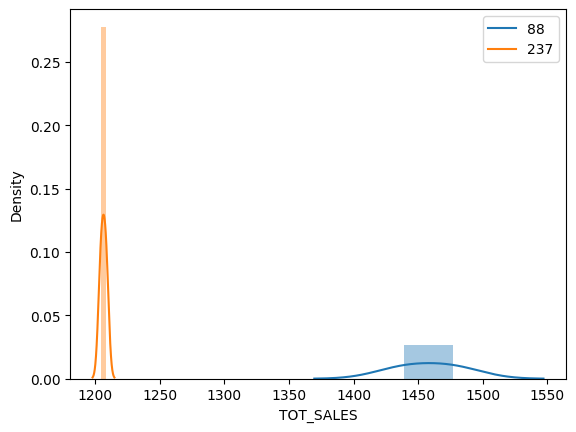

In [277]:
sns.distplot(trial.loc[88]['TOT_SALES'].tail(2))
sns.distplot(trial.loc[237]['TOT_SALES'].tail(2))
plt.legend(labels=['88','237'])

<ipython-input-278-d95a092c89fc>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-278-d95a092c89fc>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




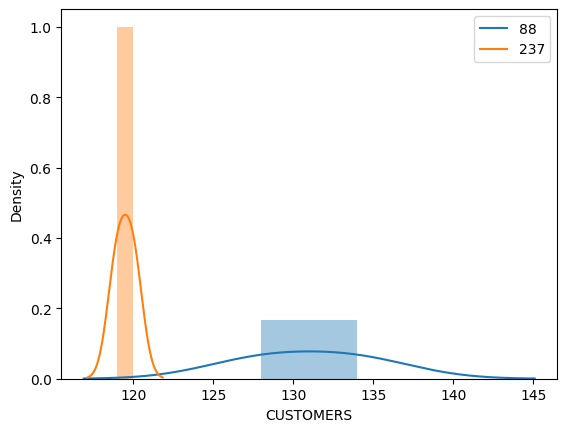

In [278]:
sns.distplot(trial.loc[88]['CUSTOMERS'].tail(2))
sns.distplot(trial.loc[237]['CUSTOMERS'].tail(2))
plt.legend(labels=['88','237'])

#### It can be visualized that the is a significant difference in the means, so trial store behavior(88) is different from control store (237).<br>
Total number of customers in the trial period for the trial store is significantly
higher than the control store for two out of three months, which indicates a
positive trial effect.




(201901.0, 201906.0)

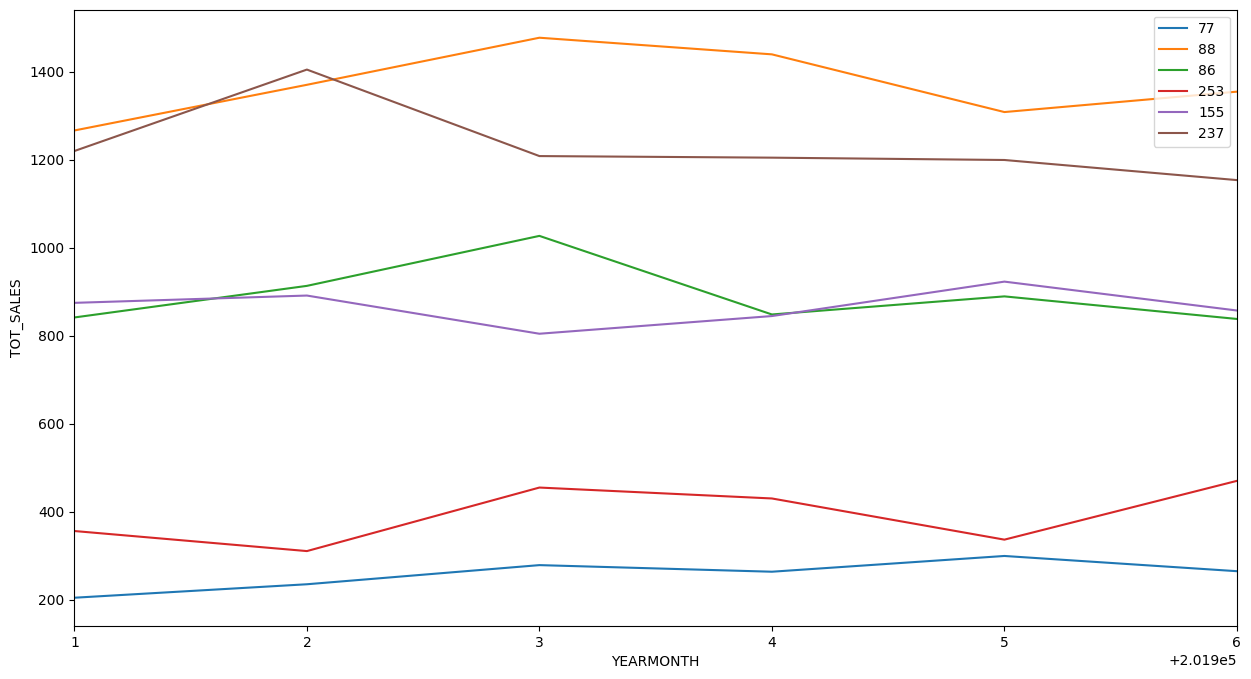

In [279]:
fig, ax = plt.subplots(figsize=(15, 8))
x=['77','88','86','253','155','237']
for i in  x:
    sns.lineplot(data=full.loc[int(i)],y='TOT_SALES',x=full.index.get_level_values(1).unique(),label=i)


#ax.set_xlim(201807,201812)
ax.set_xlim(201901,201906)

##Conclusion

The results for trial stores 77 and 88 during the trial period show a significant
difference in at least two of the three trial months but this is not the case for
trial store 86. We can check with the client if the implementation of the trial was
different in trial store 86 but overall, the trial shows a significant increase in
sales.